<div style="border:solid green 2px; padding: 20px">
    
<b>Светлана, привет!</b> Мы рады тебя видеть на территории код-ревьюеров. Ты проделала большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У тебя неограниченное количество попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

<b>Цель исследования:</b> выяснить, какие параметры жилого объекта влияют на ее стоимость (значимы для покупателей) и определяют цену, за которую объект может быть продан.
Пошагово:
<ul>
    <li>Изучить данные, чтобы понять, насколько они пригодны для исследования
    <li>Обработать данные, устранив опечатки, различное написание названий, и пропуски, если это возможно (+написать рекомендацию по заполнению таблиц, которая упростит работу в будущем, типа, "пожалуйста, для обозначения локаций пользуйтесь ID локации, а не ее названием")
    <li>Рассчитать и добавить метрики
    <li>Проанализировать их влияние
    <li>Написать вывод
</ul>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте).
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
pd.options.display.float_format = '{:,.2f}'.format #сокращаем вывод чисел с плвающей точкой до двух знаков после запятой для удобства
print(data.describe())

       total_images     last_price  total_area     rooms  ceiling_height  \
count     23,699.00      23,699.00   23,699.00 23,699.00       14,504.00   
mean           9.86   6,541,548.77       60.35      2.07            2.77   
std            5.68  10,887,013.27       35.65      1.08            1.26   
min            0.00      12,190.00       12.00      0.00            1.00   
25%            6.00   3,400,000.00       40.00      1.00            2.52   
50%            9.00   4,650,000.00       52.00      2.00            2.65   
75%           14.00   6,800,000.00       69.90      3.00            2.80   
max           50.00 763,000,000.00      900.00     19.00          100.00   

       floors_total  living_area     floor  kitchen_area   balcony  \
count     23,613.00    21,796.00 23,699.00     21,421.00 12,180.00   
mean          10.67        34.46      5.89         10.57      1.15   
std            6.60        22.03      4.89          5.91      1.07   
min            1.00         2.00   

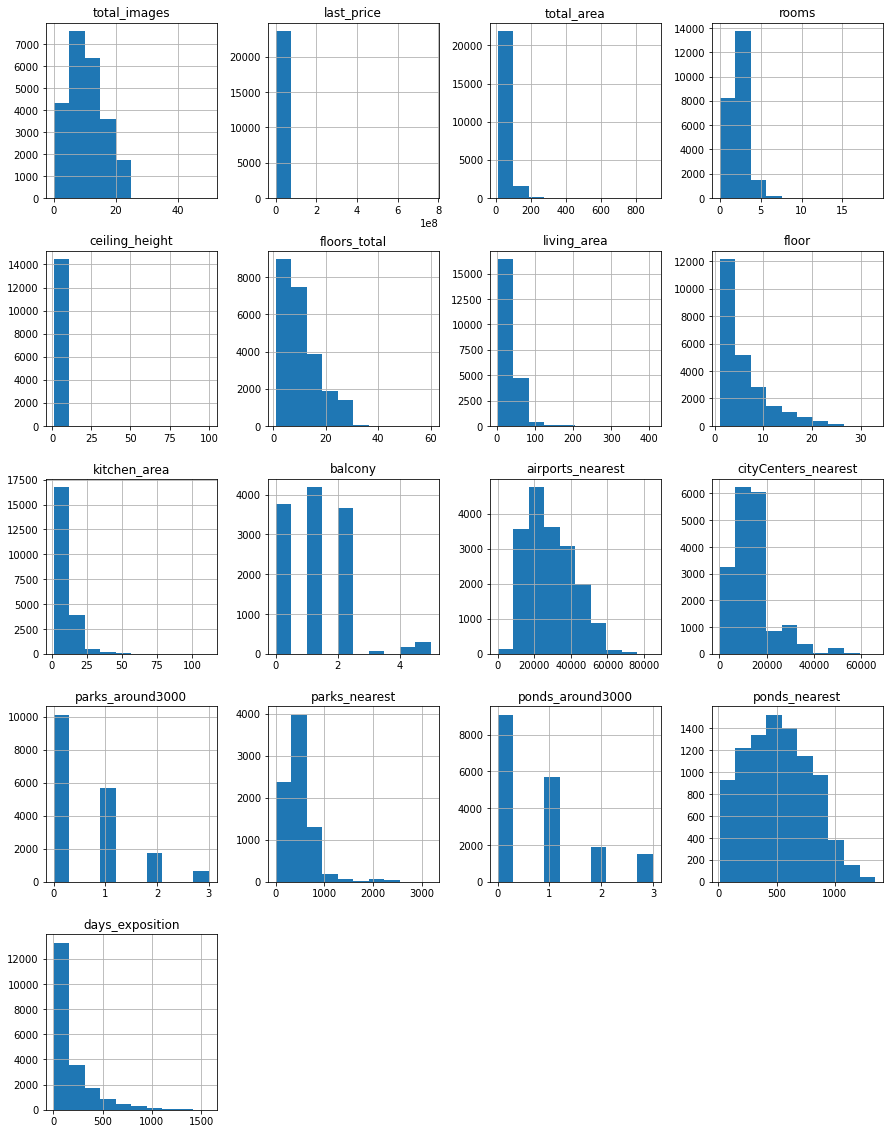

In [3]:
data.hist(figsize=(15, 20)); #строим набор гистограмм по сырым данным

<b>Общее количество записей 23699</b>
<ul>
    <li>
<b>total_images</b> -  без пропусков, целое число фотографий, кажется, что ок

<li><b>last price</b> - без пропусков, число с плавающей точкой, вероятно, цена с копейками

<li><b>total_area</b> - без пропусков, число с плавающей точкой, вероятно, в метрах. Подавляющее большинство значений - менее 200.

<li><b>first_day_exposition</b> - без пропусков, object, должен быть datetime

<li><b>rooms</b> - без пропусков, целое число, кажется, что ок

<li><b>ceiling_height</b>  - много пропусков, число с плавающей точкой. Не заполнили, когда заполняли вручную? Странно, что такая большая доля пропусков в важном параметре. Возможна потеря данных при переносе части записей из другой таблицы, где это поле в принципе отсутствует. Заполнить медианным значением? Минимум 1, максимум 100 - вряд ли такое может быть, если речь о высоте потолков, нужно перепроверить.

<li><b>floors_total</b> - минимум пропусков, число с плавающей точкой, переделать в int, общее количество этаже вряд ли может быть нецелым. Похоже, что забыли добавить общую этажность при заполнении объявления. Может быть еще одна причина: в списке много деревень – может быть, общая этажность совпадает с этажом, поскольку в деревнях много одноэтажных домов. Перепроверить и добавить общую этажность 1, если этаж квартиры 1, а локация – деревня? Удалить те строчки, где этих данных нет.
<li><b>living_area</b> - мало пропусков, число с плавающей точкой. Не заполнили, когда заполняли вручную. Один из важнейших параметров
<li><b>floor</b> - без пропусков, целое число, ок.
<li><b>is_apartment</b> - много пропусков, object, уникальные значения поля True, False и NaN. Вероятно, при ручном заполнении не вписывали частично данные там, где is_apartment = False. Решение - заполнить пропуски значением False, привести к bool.
<li><b>studio</b> - без пропусков, булево значение, ок
<li><b>open_plan</b> - без пропускоы, булево значение, ок
<li><b>kitchen_area</b> - мало пропусков, число с плавающей точкой, метров. Возможно, для восстановления недостающих данных допустимо вычесть площадь кухни из общей площади, поскольку площадь балконов, санузлов и подсобных помещений обычно минимальна. Посмотреть внимательно на корреляцию общей площади и жилой площади по тем данным, которые есть, взять медианную разницу.
<li><b>balcony</b> - много пропусков при наличествующих значениях от 0 до 5, вероятно незаполнение при отсутствии балконов. Заполнить нулями. Число с плавающей точкой заменить на int
<li><b>locality_name</b> - мало пропусков. Удалить из таблицы записи.
<li><b>airports_nearest</b> - мало пропусков, число с плавающей точкой. Максимальное значение 84,869.00, минимальное 0, среднее 28,793.67 – в метрах. Вероятно, что пустые значения возникли там, где расстояние до аэропорта превышало значение nearest (похоже, что 85 километров). Нулевые значения – квартира в аэропорту? Посмотреть внимательно на малые значения расстояния. Решение: сделать дополнительный столбец, показывающий, есть аэропорт поблизости или нет bool
    <li><b>cityCenters_nearest</b> - мало пропусков, число с плавающей точкой. Максимальное 65,968.00, минимальное 181.00, среднее 14,191.28 - в метрах. Вероятно, что пустые значения возникли там, где расстояние до центра превышало допустимое значение максимума (66 километров). Решение - дополнительный столбец с классификацией квартир по расстоянию от центра города, где NaN будет обозначено как "более 66 км".
<li><b>parks_around3000</b> - мало пропусков, число с плавающей точкой, значения от 0 до 3 и NaN. Вероятно, это количество парков, находящихся на расстоянии 3 км от квартиры. NaN логично было бы заполнить нулями, так как вероятно, при отсутствии парков на указанном расстоянии это поле не заполняли.
<li><b>parks_nearest</b> - много пропусков, число с плавающей точкой. Среднее 490.80, максимальное 3190.00, минимальное 1.00. Вероятно, километраж до ближайшего парка в метрах. Пропуски связаны с превышением максимального значения расстояния до парка. Заполнить пропуски медианным значением для локации, если парк в пределах 3 км найден?
<li><b>ponds_around3000</b> и <b>ponds_nearest</b> – обработать аналогично паркам.
<li><b>days_exposition</b> - мало пропусков, вероятно, связано с незаполнением данных о квартире либо с тем, что квартира все еще выставлена на продажу. Посмотреть внимательно, какова доля пропусков для дорогих и дешевых квартир, для тех, которые выставлены на продажу давно и недавно, сделать вывод.

<div class="alert alert-block alert-success">✔️
    
__Комментарий от ревьюера №1__
    
Отлично! Первый взгляд на данные есть, план намечен.

### Предобработка данных

In [4]:
#Дата публикации объявления
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])#сделаем object датой

#Локация продажи
data.dropna(subset=['locality_name'], inplace=True) #удаляем все данные, для которых неизвестна локация
data['locality_name'] = data['locality_name'].str.replace("посёлок", "поселок") 
data['locality_name'] = data['locality_name'].str.replace("поселок городского типа","поселок")
data['locality_name'] = data['locality_name'].str.replace("городской поселок","поселок")
data['locality_name'] = data['locality_name'].str.replace("поселок при железнодорожной станции","поселок")
data['locality_name'] = data['locality_name'].str.replace("поселок станции","поселок")
data['locality_name'] = data['locality_name'].str.replace("коттеджный поселок","поселок")
#унифицируем написание поселков

#Количество парков и прудов
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
#если парков не найдено, считаем, что их 0, приводим к целому числу
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)
#если прудов не найдено, считаем, что их 0, приводим к целому числу

#Количество комнат
data['rooms']=data['rooms'].astype('int') #не может быть не целым при продаже целого объекта
#print(len(data.query('rooms == 0 and studio !=True'))) #59 квартир, где комнат 0, но это не студия. Странно.
#print(data.query('rooms == 0 and studio !=True')) #и также их total_area и living_area  различаются, следовательно, там есть комната
data.loc[(data['rooms'] == 0) & (data['studio']==False), 'rooms'] == 1 #так и запишем

#Общее количество этажей
data['floors_total'].isna().sum() #считаем пропуски в столбце с общим количеством этажей, их немного
data.dropna(subset=['floors_total'], inplace=True) #удаляем эти записи, поскольку нельзя быть уверенными в том, не последний л это этаж
data['floors_total']=data['floors_total'].astype('int') #приводим к целочисленному значению

#Балконы
data['balcony'].isna().sum() #проверяем пропуски в столбце
data['balcony'] = data['balcony'].fillna(value=0) #заполняем их нулями
data['balcony']=data['balcony'].astype('int') #приводим столбец к целочисленному формату 

#Флаг апартаментов
data['is_apartment'] = data['is_apartment'].fillna(value=False)#заполняем пропуски в поле значением False

#Расстояние до центра города
data=data.rename(columns={'cityCenters_nearest':'city_center_nearest'})

#Время продажи
data['days_exposition'].fillna(data['days_exposition'].median(), inplace=True)


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Не стоит писать весь код в одной ячейке. Лучше так: одна ячейка = одна мысль
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Согласен, если пропуск - вероятнее всего балкон отсутствует

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Да, если пропусков меньше 5% их лучше сразу удалить, дабы сэкономить время

In [5]:
#Потолки
data['ceiling_height'].unique()#смотрим, какие есть уникальные значения
data.query('ceiling_height > 5 or ceiling_height < 2') #смотрим на выбивающиеся значения
data.loc[data.ceiling_height > 15, 'ceiling_height'] /= 10 #там, где очевидна опечатка в знаке, переставляем знак, чтобы вышло приемлемое значение
data.query('ceiling_height > 5 or ceiling_height < 2').sort_values(by='last_price', ascending=False)#смотрим в сортировке, похоже ли на правду: странные значения остались, но их немного

#заменяем пропуски медианным значением
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что не хардкодишь, а используешь условие

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Некоторые столбцы можно поменять на значения, относительно своего района (например высота пололков). Вот так
    
    
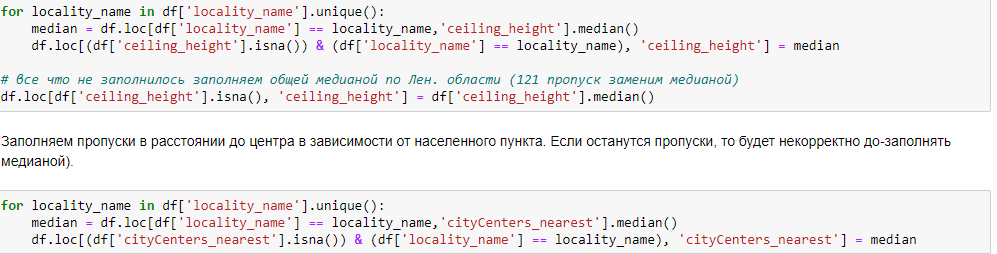
    
Если хочешь - дарю свой код =)
</div>



In [6]:
data['city_center_nearest'].fillna(data['city_center_nearest'].median(), inplace=True)#заполним медианным значением
data['city_center_nearest'] = data['city_center_nearest'].astype(int)
#Расстояния до аэропортов, парков и прудов
data['ponds_nearest'].fillna(100000, inplace=True)#заполним маркером 100км
data['airports_nearest'].fillna(100000, inplace=True)#заполним маркером 100км
data['parks_nearest'].fillna(100000, inplace=True)#заполним маркером 100км

# Заменяем пустые значения жилой площади и площади кухни
living_coef = data['living_area'].mean() / data['total_area'].mean() #среднее соотношение жилой и общей
kitchen_coef = data['kitchen_area'].mean() / data['total_area'].mean() #среднее соотношение кухни и общей
data['living_area'].fillna(living_coef * data['total_area'], inplace=True) #заполняем пропуски вычисляемым значением
data['kitchen_area'].fillna(kitchen_coef * data['total_area'], inplace=True)#то же самое по кухне

# Устанавливаем маркер 1600(максимум по полю = 1,580.00) для пропусков во времени продажи (еще не проданы?), делаем целым числом
data['days_exposition'].fillna(data['city_center_nearest'].median(), inplace=True)
data['days_exposition'] = data['days_exposition'].astype(int)

#Меняем тип данных в Количестве фотографий
data['total_images'] = data['total_images'].astype(int)

data.info() #кажется, что теперь ок



<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

    
Если честно, то не понял смысл этой строки? Тут заменяешь на медианое значение другого столбца? Не обязательно заполнять все пропуски. Например в столбце days_exposition я бы рекомендовал их оставить, как есть. Т.к. любая замена - это или случайное число или заглушка. Которые исказят результаты исследовательского анализа

`data['days_exposition'].fillna(data['city_center_nearest'].median(), inplace=True)`

In [8]:
#Проверим датасет на явные дубликаты
data.duplicated().sum()

0

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверка на дубликаты - основа предобработки данных
</div>

data['first_day_exposition'] в datetime из object - формат понадобится для построения графиков по времени, и еще, чтобы посмотреть распределения по дням недели, сезонные и годовые вплески и изменения
Целые числа для парков, прудов логичны (трудно представить, как выглядит половина пруда или парка), и этажей – так можно будет соотнести общую этажность с номером этажа и понять, не находится ли квартира на первом или последнем этажах (что влияет на стоимость и привлекательность объекта)
То же самое касается числа балконов и числа приложенных фотографий объекта – квартира с половиной балкона вряд ли может быть выставлена на продажу, а половина фотографии – это все же фотография, пусть и не очень хорошая
Дни показа объявления также считаем целыми числами – так будет проще, прибавив их к дате публикации объявления, узнать дату продажи (может быть, есть месяцы или дни недели, когда продается больше или меньше квартир, чем обычно)


### Посчитайте и добавьте в таблицу новые столбцы

In [9]:
#стоимость квадратного метра
data['square_price'] = data['last_price'] / data['total_area']
data['square_price'] = data['square_price'].astype(int)

# Добавляем столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year




<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет на будущие работы (в этом проекте этот метод не нужен): обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
    
Вот хорошая статья на этот счёт: 
    
    https://runebook.dev/ru/docs/numpy/reference/arrays.datetime
    
    и
    
    https://stackoverflow.com/questions/70901855/get-hour-and-minutes-and-seconds-from-numpy-datetime64
</div>

In [10]:
#разметим все объекты по типам этажей: первый (теоретически должен снижать цену), последний (теоретически должен снижать цену) и другой (не влияет на цену)
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1) #добавим столбец в общую таблицу

#найдем значение удаленности объекта от центра в км
data['distance'] = (data['city_center_nearest']/1000).astype(int)
data.columns #проверим, что новый столбец на месте


Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'square_price', 'weekday', 'month',
       'year', 'floor_type', 'distance'],
      dtype='object')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Этот раздел выполнен качественно
</div>

### Проведите исследовательский анализ данных

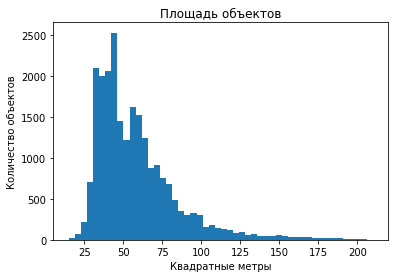

Топ10 по общей площади:
19540   900.00
12859   631.20
3117    631.00
15651   618.00
5358    590.00
4237    517.00
8018    507.00
15016   500.00
5893    500.00
12401   495.00
Name: total_area, dtype: float64


In [11]:
#Посмотрим на общую площадь объектов в датасете
plt.hist(data['total_area'], bins=50, range=(15, 210))
plt.title('Площадь объектов')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объектов')
plt.show()
print('Топ10 по общей площади:')
print(data['total_area'].sort_values(ascending=False).head(10))


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что используешь метод range() для определения пиковых значений
</div>

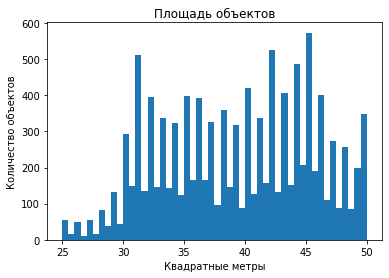

0   108.00
1    40.40
2    56.00
3   159.00
4   100.00
Name: total_area, dtype: float64


count   23,565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

In [12]:
#Отдельно посмотрим на эти пики, где количество продаваемых объектов велико
plt.hist(data['total_area'], bins=50, range=(25, 50))
plt.title('Площадь объектов')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объектов')
plt.show()
print(data['total_area'].head())
data['total_area'].describe()

Среднее значение общей площади объектов в выборке 60.32 метра, минимальное - 12м (студия?), максимальное 900м. Квартира площадью квадратный километр? Больше похоже на крытое футбольное поле. Отфильтруем недостоверные значения.
Есть заметный пик около 32 (похоже, что это типичная однушка или студия), второй - около 45 (больше похоже на небольшую двушку), мало квартир после 100 метров и до 20. 

In [13]:
good_objects = data.query('total_area <400')
print(len(good_objects))

23539


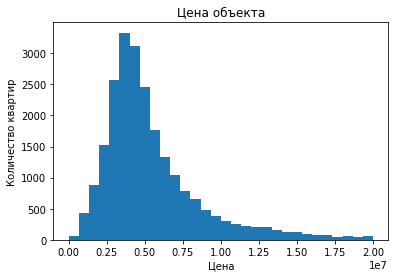

Самые дешевые квартиры:
18867   470,000.00
21912   470,000.00
5698    450,000.00
17676   450,000.00
9581    450,000.00
16219   450,000.00
16274   440,000.00
17456   430,000.00
14911   430,000.00
8793     12,190.00
Name: last_price, dtype: float64


count        23,565.00
mean      6,540,058.26
std      10,910,934.72
min          12,190.00
25%       3,400,000.00
50%       4,646,000.00
75%       6,790,000.00
max     763,000,000.00
Name: last_price, dtype: float64

In [14]:
#Изучим цены объекта
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Цена объекта')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()
print('Самые дешевые квартиры:')
print(data['last_price'].sort_values(ascending=False).tail(10))
data['last_price'].describe()

Средняя стоимость квартиры - чуть менее 6,5 млн, максимальная 470 млн, минимальная 12 тысяч. Отфильтруем  слишком дешевые квартиры, стоимость которых не похожа на типичную



In [15]:
good_objects = good_objects.query('last_price > 450000')
print(good_objects)

       total_images    last_price  total_area first_day_exposition  rooms  \
0                20 13,000,000.00      108.00           2019-03-07      3   
1                 7  3,350,000.00       40.40           2018-12-04      1   
2                10  5,196,000.00       56.00           2015-08-20      2   
3                 0 64,900,000.00      159.00           2015-07-24      3   
4                 2 10,000,000.00      100.00           2018-06-19      2   
...             ...           ...         ...                  ...    ...   
23694             9  9,700,000.00      133.81           2017-03-21      3   
23695            14  3,100,000.00       59.00           2018-01-15      3   
23696            18  2,500,000.00       56.70           2018-02-11      2   
23697            13 11,475,000.00       76.75           2017-03-28      2   
23698             4  1,350,000.00       32.30           2017-07-21      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ... 

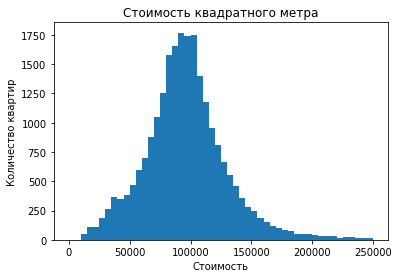

Самые дорогие квартиры за метр:
12971    1907500
1436     1736842
22831    1542604
14706    1000748
4996      995983
16461     857542
4859      848484
17172     848484
16647     841379
17912     813253
Name: square_price, dtype: int64


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday,month,year,distance
count,"23,531.00","23,531.00","23,531.00","23,531.00","23,531.00","23,531.00","23,531.00","23,531.00","23,531.00","23,531.00",...,"23,531.00","23,531.00","23,531.00","23,531.00","23,531.00","23,531.00","23,531.00","23,531.00","23,531.00","23,531.00"
mean,9.88,"6,387,045.23",59.85,2.07,2.70,10.68,34.33,5.88,10.45,0.59,...,0.47,"66,114.12",0.59,"61,862.16",169.23,"99,210.69",2.57,6.40,"2,017.37",13.54
std,5.68,"8,228,073.17",32.41,1.07,0.25,6.59,20.79,4.87,5.82,0.96,...,0.75,"47,157.65",0.88,"48,369.82",206.52,"48,290.52",1.79,3.49,1.04,7.55
min,0.00,"470,000.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,...,0.00,1.00,0.00,13.00,1.00,"9,615.00",0.00,1.00,"2,014.00",0.00
25%,6.00,"3,400,000.00",40.00,1.00,2.60,5.00,19.00,2.00,7.00,0.00,...,0.00,601.00,0.00,639.00,45.00,"76,585.00",1.00,3.00,"2,017.00",10.00
50%,9.00,"4,630,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,...,0.00,"100,000.00",0.00,"100,000.00",95.00,"95,000.00",3.00,6.00,"2,017.00",13.00
75%,14.00,"6,750,000.00",69.52,3.00,2.70,16.00,42.10,8.00,12.00,1.00,...,1.00,"100,000.00",1.00,"100,000.00",198.00,"114,192.00",4.00,10.00,"2,018.00",15.00
max,50.00,"330,000,000.00",399.00,19.00,14.00,60.00,264.50,33.00,107.00,5.00,...,3.00,"100,000.00",3.00,"100,000.00","1,580.00","1,736,842.00",6.00,12.00,"2,019.00",65.00


In [16]:
#Посмотрим на цены квадратного метра
plt.hist(good_objects['square_price'], bins=50, range=(0,250000))
plt.title('Стоимость квадратного метра')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Самые дорогие квартиры за метр:')
print(data['square_price'].sort_values(ascending=False).head(10))
good_objects.describe()

Почти два миллиона за квадрат? Странно, но возможно, это люксовые квартиры

Теперь общая картина больше похожа на правду, за исключением потолков. Попробуем поделить их на группы, пользуясь типичными значениями высот потолков

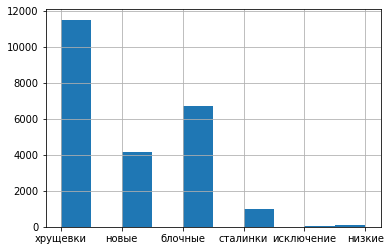

In [17]:
roof_type =[]
for roof in good_objects['ceiling_height']:
    if roof <2.5:
        roof_type.append('низкие')
    elif 2.5 <= roof <= 2.6:
        roof_type.append('блочные')
    elif 2.6 <roof<=2.7:
        roof_type.append('хрущевки')
    elif 2.7 < roof < 3.2:
        roof_type.append('новые')
    elif 3.2 <= roof <=4:
        roof_type.append('сталинки')
    else:
        roof_type.append('исключение')
    

good_objects['ceiling_type'] = roof_type
pd.Series(good_objects['ceiling_type'].hist())
plt.show()

кажется, очень малых и очень больших значений немного, похоже на неверные сведения об объектах недвижимости



In [18]:
frod = good_objects.query('ceiling_type in ["исключение", "низкие"]')
print(len(frod))
print((len(frod)/len(good_objects)*100)) #процент от всего датасета

print(frod.head())
print(good_objects.info())

126
0.5354638561897073
     total_images    last_price  total_area first_day_exposition  rooms  \
154             1  8,200,000.00       80.00           2018-11-06      3   
193             6  7,920,000.00       83.80           2017-08-17      4   
227            13  2,200,000.00       47.00           2018-01-12      3   
464            15 66,571,000.00      280.30           2015-06-11      6   
552            11  2,999,000.00       33.50           2017-03-30      1   

     ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
154            4.15             3        44.20      2         False  ...   
193            2.47             9        55.90      9         False  ...   
227            2.34             5        26.85      1         False  ...   
464            5.20             8       159.50      7         False  ...   
552            2.00            15        17.50      6         False  ...   

     ponds_around3000  ponds_nearest  days_exposition  square_price w

In [19]:
#Избавимся от них
good_objects = good_objects.query('ceiling_type not in ["исключение", "низкие"]') 
good_objects.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday,month,year,distance
count,"23,405.00","23,405.00","23,405.00","23,405.00","23,405.00","23,405.00","23,405.00","23,405.00","23,405.00","23,405.00",...,"23,405.00","23,405.00","23,405.00","23,405.00","23,405.00","23,405.00","23,405.00","23,405.00","23,405.00","23,405.00"
mean,9.88,"6,355,731.23",59.76,2.06,2.69,10.70,34.27,5.88,10.45,0.59,...,0.47,"66,169.79",0.59,"61,890.65",169.11,"99,109.13",2.57,6.40,"2,017.37",13.55
std,5.68,"8,049,769.10",32.12,1.06,0.20,6.60,20.61,4.87,5.78,0.96,...,0.75,"47,138.89",0.88,"48,362.95",206.47,"47,752.51",1.79,3.49,1.04,7.55
min,0.00,"470,000.00",12.00,0.00,2.50,1.00,2.00,1.00,1.30,0.00,...,0.00,1.00,0.00,13.00,1.00,"9,615.00",0.00,1.00,"2,014.00",0.00
25%,6.00,"3,420,000.00",40.00,1.00,2.60,5.00,19.00,2.00,7.00,0.00,...,0.00,602.00,0.00,640.00,45.00,"76,666.00",1.00,3.00,"2,017.00",10.00
50%,9.00,"4,630,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,...,0.00,"100,000.00",0.00,"100,000.00",95.00,"95,000.00",3.00,6.00,"2,017.00",13.00
75%,14.00,"6,750,000.00",69.50,3.00,2.70,16.00,42.00,8.00,12.00,1.00,...,1.00,"100,000.00",1.00,"100,000.00",198.00,"114,114.00",4.00,10.00,"2,018.00",15.00
max,50.00,"330,000,000.00",398.00,19.00,4.00,60.00,264.50,33.00,107.00,5.00,...,3.00,"100,000.00",3.00,"100,000.00","1,580.00","1,736,842.00",6.00,12.00,"2,019.00",65.00


Кажется, что теперь ок

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Построены гистограммы не по всем пунктам шага 4.3 брифа. Добавь, пожалуйста
</div>

<b>Попробуем посмотреть корреляцию</b>

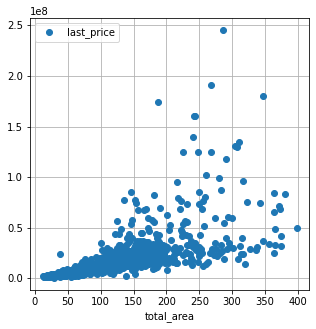

Корреляция цены и площади: 

            last_price  total_area
last_price        1.00        0.88
total_area        0.88        1.00 



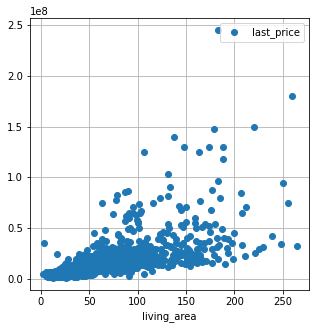

Корреляция цены и жилой площади: 

             last_price  living_area
last_price         1.00         0.77
living_area        0.77         1.00 



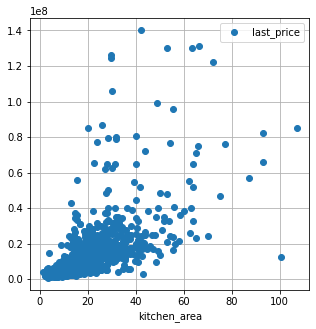

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area          1.00        0.33
last_price            0.33        1.00 



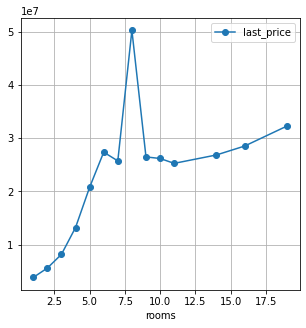

Корреляция цены и числа комнат: 

            last_price  rooms
last_price        1.00   0.62
rooms             0.62   1.00 



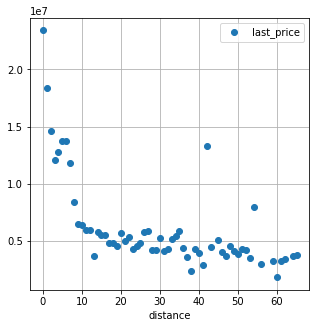

Корреляция цены и удалённости от центра: 

            distance  last_price
distance        1.00        0.48
last_price      0.48        1.00 



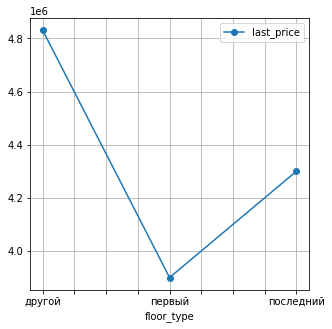

Корреляция цены и типа этажа: 

            last_price
last_price        1.00 



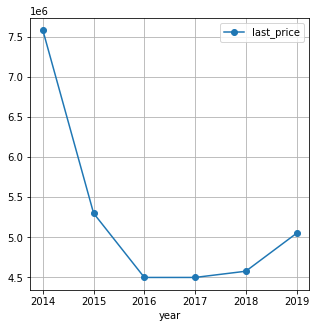

Корреляция цены и года продажи: 

            last_price  year
last_price        1.00  0.06
year              0.06  1.00 



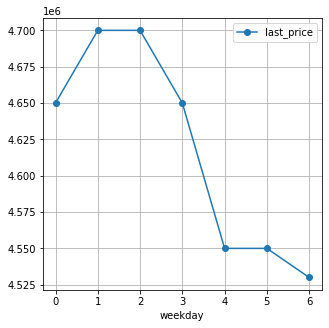

Корреляция цены и дня недели продажи 

            last_price  weekday
last_price        1.00     0.43
weekday           0.43     1.00 



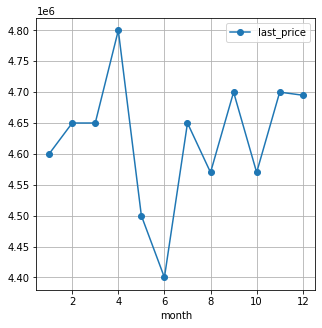

Корреляция цены и дня недели продажи 

            last_price  month
last_price        1.00  -0.02
month            -0.02   1.00 



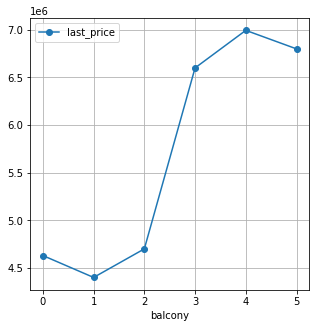

Корреляция цены и количества балконов: 

            balcony  last_price
balcony        1.00        0.10
last_price     0.10        1.00 



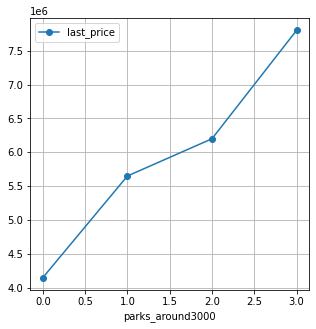

Корреляция цены и количества парков поблизости: 

                  last_price  parks_around3000
last_price              1.00             -0.29
parks_around3000       -0.29              1.00 



In [20]:
#Зависимость цены от общей площади
good_objects.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и площади:','\n')
print(good_objects.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

#Зависимость цены от жилой площади:
good_objects.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(good_objects.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

#Зависимость цены от площади кухни:
good_objects.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(good_objects.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

# Зависимость цены от числа комнат
good_objects.query('rooms >0').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

plt.show()
print('Корреляция цены и числа комнат:','\n')
print(good_objects.query('rooms >0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

# Зависимость цены от удалённости от центра
(
    good_objects.pivot_table(index='distance', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(good_objects.pivot_table(index='floor', values=['distance', 'last_price']).corr(),'\n')

# Зависимость цены от типа этажа
(
    good_objects.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и типа этажа:','\n')
print(good_objects.pivot_table(index='floor', values=['floor_type', 'last_price']).corr(),'\n')

#Зависимость цены от года продажи
(
    good_objects.pivot_table(index='year', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и года продажи:','\n')
print(good_objects.pivot_table(index='floor', values=['year', 'last_price']).corr(),'\n')

#Зависимость цены от дня недели выставления объявления
(
    good_objects.pivot_table(index='weekday', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и дня недели продажи','\n')
print(good_objects.pivot_table(index='floor', values=['weekday', 'last_price']).corr(),'\n')

#Зависимость цены от месяца выставления объявления
(
    good_objects.pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и дня недели продажи','\n')
print(good_objects.pivot_table(index='floor', values=['month', 'last_price']).corr(),'\n')


#Зависимость цены от количества балконов
(
    good_objects.pivot_table(index='balcony', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и количества балконов:','\n')
print(good_objects.pivot_table(index='floor', values=['balcony', 'last_price']).corr(),'\n')


#Зависимость цены от количества парков поблизости
(
    good_objects.pivot_table(index='parks_around3000', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и количества парков поблизости:','\n')
print(good_objects.pivot_table(index='floor', values=['parks_around3000', 'last_price']).corr(),'\n')



Очевидно, что с ростом площади растет и цена объекта. Это важная метрика.
В зависимости от количества комнат цена также растет, однако нелинейно: в сегменте квартир с более чем 5 комнатами количество почти не влияет на цену.
Близость к центру заметно увеличивает цену квартиры только в непосредственной близости к центру (менее 10 км). Чем ближе – тем выше цена (0,88).
Еще заметнее на цену влияет жилая площадь (0,77), а самым важным фактором можно признать площадь кухни (0,33).

Расположение объекта продажи на первом и последнем этажах влияет на цену продажи объекта, снижая ее, причем расположение на первом этаже снижает ее сильнее, чем на последнем

Квартиры, выставленные на продажу в 2014 году, продавались по максимальным за весь период наблюдений ценам, затем последовало падение (рынка?) до точки минимума в 2016-2017 годах, затем стоимость начала потихоньку расти, однако к значениям 2014 года к 2019 так и не вернулась.

По наиболее высокой цене продаются квартиры, выставленные на продажу во вторник и среду, по самой низкой – выставленные в воскресенье.

По наиболее высоким ценам продаются квартиры, выставленные на продажу в апреле, по минимальным – выставленные в июне (сезон отпусков и низкий трафик в этой области рынка?). Выставив квартиру в сентябре, ноябре или декабре, есть вероятность продать ее за хорошую цену (Санкт-Петербург и Ленобласть – северные регионы, вероятно важно, насколько жилье хорошо обогревается, а в холодные месяцы это проще оценить. Падение в январе, веноятно, компенсирует рост в декабре - квартира как новогодний подарок?)

Наличие балкона – тоже важная метрика: с ростом числа балконов растет и цена, причем квартиры с более чем 2 балконами растут в цене очень заметно.

Количество парков в радиусе трех километров также влиет на цену продажи: вероятнее всего, что наличие благоустроенных зеленых зон в целом является маркером ухоженности и благополучности района. Квартиры без парков поблизости дешевле тех, у которых зеленые зоны есть, причем чем больше количество парков, тем квартира дороже.




<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Шаг 4.3 брифа позаимствован из стороннего источника. Выполни, пожалуйста, этот шаг полностью заново и самостоятельно

Среднее время продажи квартиры, дни: 169.0
Медианное время продажи квартиры, дни: 95.0


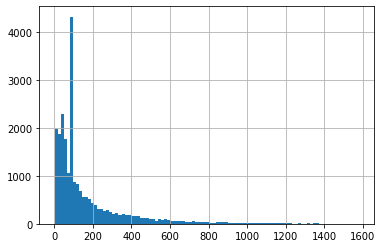

In [21]:
#Как долго продаются квартиры
good_objects['days_exposition'].hist(bins=100)

print('Среднее время продажи квартиры, дни:', good_objects['days_exposition'].mean().round())
print('Медианное время продажи квартиры, дни:',good_objects['days_exposition'].median())


Как правило, нормальное время продажи квартиры - от 0 до 200 дней, быстрой продажей можно считать продажу до 30 дней (большой скачок продаж). Период продажи свыше 200 дней – долгие продажи.

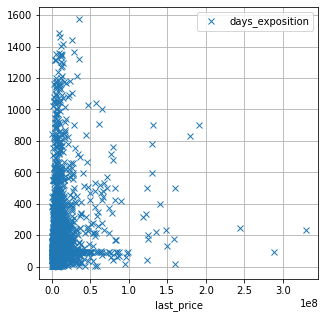

Корреляция цены и времени, которое занимает продажа: 

                 days_exposition  last_price
days_exposition             1.00        0.62
last_price                  0.62        1.00 



In [22]:
#Зависимость цены от времени продажи
(
    good_objects.pivot_table(index='last_price', values='days_exposition', aggfunc='median')
    .plot(grid=True, style='x', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и времени, которое занимает продажа:','\n')
print(good_objects.pivot_table(index='balcony', values=['last_price','days_exposition']).corr(),'\n')

Кажется, что нет связи между ценой квартиры и временем, за которое она продается: большинство квартир продается в период до 400 дней, есть заметный пик в районе 95 дней.

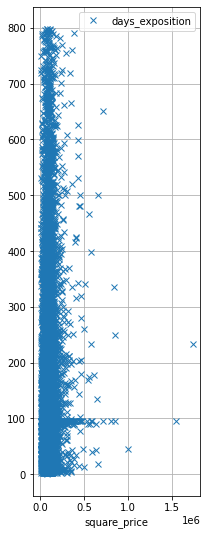

Корреляция времени, которое занимает продажа, в сегменте квартир с низкой стоимостью кв метра: 

                 days_exposition  last_price
days_exposition             1.00        0.62
last_price                  0.62        1.00 



In [23]:
#Зависимость цены от времени продажи
(
    good_objects.query('square_price <200000'and'days_exposition <800').pivot_table(index='square_price', values='days_exposition', aggfunc='median')
    .plot(grid=True, style='x', figsize=(3, 9))
)
plt.show()
print('Корреляция времени, которое занимает продажа, в сегменте квартир с низкой стоимостью кв метра:','\n')
print(good_objects.pivot_table(index='balcony', values=['last_price','days_exposition']).corr(),'\n')

Однако можно заметить, что квартиры с низкой стоимостью квадратного метра, как правило, продаются быстро.

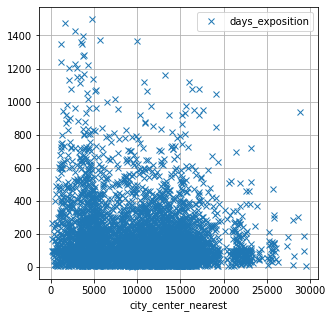

Корреляция цены и времени, которое занимает продажа: 

                 days_exposition  distance
days_exposition             1.00     -0.48
distance                   -0.48      1.00 



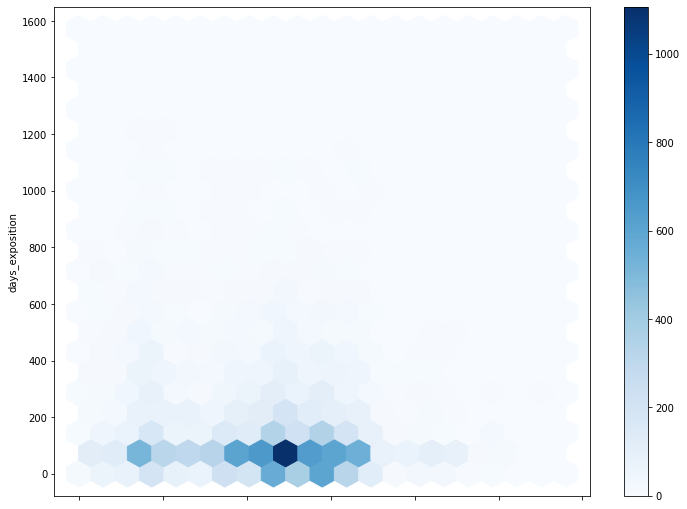

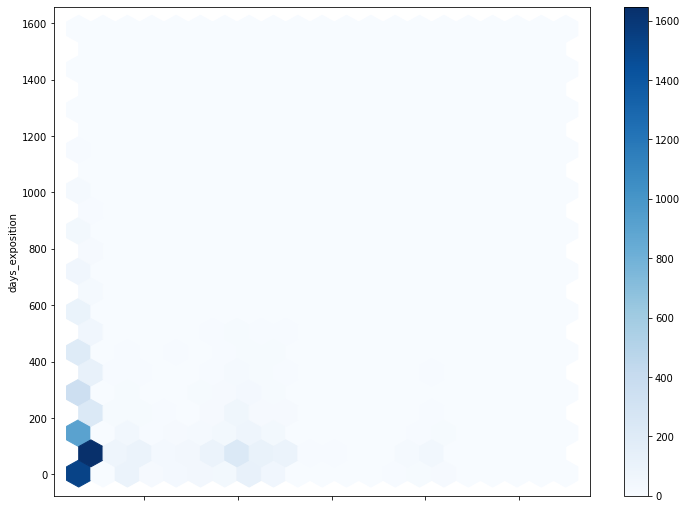

In [24]:
#Зависимость времени продажи от расположения: в Питере
(
    good_objects.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_center_nearest', values='days_exposition', aggfunc='median')
    .plot(grid=True, style='x', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и времени, которое занимает продажа:','\n')
print(good_objects.pivot_table(index='balcony', values=['distance','days_exposition']).corr(),'\n')

#Зависимость времени продажи от расположения: везде, кроме Питера
#good_objects.query('locality_name != "Санкт-Петербург"').plot.hexbin(x='city_center_nearest', y='days_exposition', gridsize=5)
#plt.show()
ax = good_objects.query('locality_name == "Санкт-Петербург"').plot(
    kind='hexbin',
    x='distance',
    y='days_exposition',
    C=None,
    gridsize=20,
    figsize=(12,9),
    cmap="Blues")

ax = good_objects.query('locality_name != "Санкт-Петербург"').plot(
    kind='hexbin',
    x='distance',
    y='days_exposition',
    C=None,
    gridsize=20,
    figsize=(12,9),
    cmap="Blues")

В Питере квартиры в основном сосредоточены в радиусе около 20 км от центра и как правило, продается быстро: до 95 дней
В других локациях есть значительная группа квартир в радиусе от 15 до 36 км,  и около 50, которые продаются за период от 50 до 95 дней.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Немного не так, чтобы ответить на вопрос "Какие продажи можно считать быстрыми, а какие — необычно долгими?" лучше посмотреть на распределение данных с помощью boxplot() или describe().
</div>

In [25]:
#Стоимость квадратного метра на километр удаленности

sq_price_spb = good_objects.query('locality_name == "Санкт-Петербург"').pivot_table(index='distance', values='square_price', aggfunc='mean')
print('Стоимость квадратного метра недвижимости на каждый километр от центра Санкт-Петербурга')
print(sq_price_spb)

Стоимость квадратного метра недвижимости на каждый километр от центра Санкт-Петербурга
          square_price
distance              
0           189,216.19
1           165,100.31
2           142,094.43
3           126,322.96
4           136,539.86
5           145,038.16
6           151,677.20
7           140,715.44
8           119,874.05
9           110,347.77
10          111,514.44
11          106,636.32
12          108,296.07
13          109,052.12
14          104,992.88
15          101,940.15
16          100,107.69
17           94,665.97
18           94,885.91
19           95,433.95
20          107,100.54
21           91,492.22
22           88,714.24
23           91,772.83
24           82,439.91
25           90,436.55
26           75,171.33
27          132,115.00
28           81,840.20
29           62,481.67


Стоимость квадратного метра жилья в Санкт-Петербурге стабильно падает до 20 километра (где, вероятно, кончается город и начинается благоустроенная пригородная зона или территории городов-спутников), после продолжает снижаться до 27 километра (другой город, инфраструктура которого оказывает влияние на стоимость?) и падает до 62,4 тысяч за квадрат на 29 километре. 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Давай сделаем проект сильнее, и по этой сводной таблице построим линейную или столбчатую диграмму для визуализации динамики цены относительно удалённости?
</div>

In [26]:
#Считаем среднюю цену квадрата в локациях с наибольшим количеством объявлений

big_location = good_objects.pivot_table(index='locality_name', values='square_price', aggfunc=['mean','count'])
#print(big_location)
#big_location.columns
big_location.sort_values([('count', 'square_price')], ascending=False).head(10) 


,mean,count
,square_price,square_price
locality_name,,
Санкт-Петербург,"114,365.88",15545
поселок Мурино,"85,629.11",552
поселок Шушары,"78,550.88",439
Всеволожск,"68,669.99",396
Пушкин,"103,079.43",365
Колпино,"75,443.55",337
поселок Парголово,"90,205.00",326
Гатчина,"68,745.69",307


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Таблица верна. Совет: на общие продажи лучше смотреть через призму медианы. Она более устойчива к выбросам
</div>

### Общий вывод

Типичная квартира выборки: площадь около 70 кв.м, из них жилая - около 42, кухня - около 12, комнат обычно 2, потолки стандартные 2.7 метра, с одним балконом или без него. Чаще всего квартиры в 15-20 км от центра и в 25 км от аэропорта, с парковой зоной и прудом поблизости. Квартиры чаще публикуются в будни, пиковый день – среда, пиковые месяцы публиикаций -июнь/июль (что, вероятно, и объясняет падение цен в этот период). Квартиры чаще всего продаются за 95 дней, поэтому продажи длительностью меньше 30 и больше 200 дней можно считать необычайно быстрыми и долгими, соответственно. Больше всего объявлений приходится на СПб и поселок Мурино (м.Девяткино), который тоже можно условно считать городским районом из-за близости станции метро. Самая дорогая недвижимость – в г. Пушкин (Царское село) и д. Кудрово (м. Улица Дыбенко). Самая низкая из топа объявлений - в Выборге.

Зависимость стоимости квартиры от параметров: На общую стоимость жилья влияет площадь квартиры, ее жилая площадь и площадь кухни, а также наличие/отсутствие балкона. Больше всего на стоимость квартиры в СПб влияет ее удаленность от центра города: с каждым километром цена квадратного метра падает, повышаясь только в зоне блогоустроенных новых районов (новостройки в зоне новых конечных станций метро или пригороды)

Расположение объекта продажи на первом и последнем этажах влияет на цену продажи объекта, снижая ее, причем расположение на первом этаже снижает ее сильнее, чем на последнем

Квартиры, выставленные на продажу в 2014 году, продавались по максимальным за весь период наблюдений ценам, затем последовало падение (рынка?) до точки минимума в 2016-2017 годах, затем стоимость начала потихоньку расти, однако к значениям 2014 года к 2019 так и не вернулась.

По наиболее высоким ценам продаются квартиры, выставленные на продажу в апреле, по минимальным – выставленные в июне (сезон отпусков и низкий трафик в этой области рынка?). Выставив квартиру в сентябре, ноябре или декабре, есть вероятность продать ее за хорошую цену (Санкт-Петербург и Ленобласть – северные регионы, вероятно важно, насколько жилье хорошо обогревается, а в холодные месяцы это проще оценить. Падение в январе, веноятно, компенсирует рост в декабре: люди, желающие такой подарок на новый год, будут покупать ее до праздников.

Еще одним паматером, влияющим на стоимость квартиры, можно считать ее расположение – близость парков и прудов: благоустроенные зоны дороже.


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Шикарный вывод и рекомендации для бизнеса. Кстати, хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. Ведь вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно.
</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:

1) Замена пропусков

2) Шаг 4.1 (рассмотрены не все пункты)

3) Какие продажи можно считать быстрыми, а какие — необычно долгими?

4) Шаг 4.3 выполнить заново и самостоятельно

5) В последнем шаге добавить линейную или столбчатую диаграмму

6) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод